Experiment 1 with IAM dataset
============================================

In [1]:
from __future__ import print_function

import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
from torchvision import datasets, models, transforms
import time
import os
from utils import *
from classes import *

use_gpu = torch.cuda.is_available()

print('main imports complete')

main imports complete


In [2]:
# ========================================
# Step 1. define data transform
#
# Including different forms of data augmentation
# One will include nearly all types (excluding random crops, etc. that may remove handwriting.)
# The other will include a selected set of augmentations
# Keeping 'train', 'val', and 'test' transforms just in case we want to include different functionalities
# ========================================

# Need the __name__ check to make multiprocessing work on Windows for some reason
# if __name__ == '__main__':
print("Set up data transforms.")
img_input_size = 56

selected_transforms = {
    'train': transforms.Compose([
        transforms.RandomHorizontalFlip(),
        # RandomRotation does not seem to be working on Windows right now
        transforms.RandomRotation(45),

        transforms.ColorJitter(brightness=0, contrast=0, saturation=0, hue=0.5),
        transforms.RandomGrayscale(p=0.1),

        transforms.Grayscale(), # not sure why the current input is not grayscale, do grayscale conversion
        transforms.Resize((img_input_size,img_input_size)),
        transforms.ToTensor(),
    ]),
    # should not do random transformation in val or test set
    'val': transforms.Compose([
        transforms.Grayscale(),
        transforms.Resize((img_input_size,img_input_size)),
        transforms.ToTensor(),
    ]),
    'test': transforms.Compose([
        transforms.Grayscale(),
        transforms.Resize((img_input_size,img_input_size)),
        transforms.ToTensor(),
    ]),
}

net1_data_transforms = {
    'train': transforms.Compose([
        transforms.Resize(64),
        transforms.RandomHorizontalFlip(),
        transforms.RandomVerticalFlip(),
        transforms.Grayscale(),
        transforms.ToTensor()
        
    ]),
    'val': transforms.Compose([
        transforms.Resize(64),
        transforms.Grayscale(),
        transforms.ToTensor(),
    ]),
    
    'test': transforms.Compose([
        transforms.Resize(64),
        transforms.Grayscale(),
        transforms.ToTensor(),
    ]),
}

# data_transforms = selected_transforms
data_transforms = net1_data_transforms


Set up data transforms.


In [3]:
all_data_dir = '/home/rahul/data/handwriting/sampled/dim64x64-stride8x8/train_val_test'
set_types = ['train', 'val', 'test']

imagefolders = {t : datasets.ImageFolder(os.path.join(all_data_dir, t),
                                        transform = data_transforms[t])
               for t in set_types}
for t in set_types:
    print(str(t) + ' count:', len(imagefolders[t]))

train count: 12138
val count: 4042
test count: 4178


device_name cuda
Creating Net1.

Epoch 0/199
----------
Phase:train
average loss: 0.21883062698765865
f1_pos: 0.9133356305995864
f1_neg: 0.9205873065993053

Phase:val
average loss: 1.3976553262666214
f1_pos: 0.7767216294859359
f1_neg: 0.6070331171048139


Epoch 1/199
----------
Phase:train
average loss: 0.1394772456422102
f1_pos: 0.9403295750216826
f1_neg: 0.9460222815000784

Phase:val
average loss: 0.27429517882404675
f1_pos: 0.9021113243761996
f1_neg: 0.9195402298850576


Epoch 2/199
----------
Phase:train
average loss: 0.12439251172422754
f1_pos: 0.9533002869814766
f1_neg: 0.9579713547781169

Phase:val
average loss: 0.34575185105241446
f1_pos: 0.8774880852256799
f1_neg: 0.9032543723710428


Epoch 3/199
----------
Phase:train
average loss: 0.13286202378825157
f1_pos: 0.9460136477498489
f1_neg: 0.9507835262619104

Phase:val
average loss: 1.0057257920547855
f1_pos: 0.6504887091338052
f1_neg: 0.7973421926910298


Epoch 4/199
----------
Phase:train
average loss: 0.11037471897815397
f1_po

Phase:val
average loss: 4.006512874308817
f1_pos: 0.31552376945729915
f1_neg: 0.714911512178027


Epoch 37/199
----------
Phase:train
average loss: 0.09517393120812966
f1_pos: 0.9592309672989443
f1_neg: 0.9623762376237625

Phase:val
average loss: 0.23172685723679895
f1_pos: 0.8373065662902551
f1_neg: 0.7643852210781344


Epoch 38/199
----------
Phase:train
average loss: 0.09511947894245165
f1_pos: 0.9600549780946654
f1_neg: 0.9631974673525919

Phase:val
average loss: 0.05044936852871575
f1_pos: 0.9891605747416183
f1_neg: 0.9895555015788196


Epoch 39/199
----------
Phase:train
average loss: 0.08570811078185638
f1_pos: 0.9645842309349417
f1_neg: 0.967563728198248

Phase:val
average loss: 0.22721781318787004
f1_pos: 0.9379310344827586
f1_neg: 0.9457579972183588


Epoch 40/199
----------
Phase:train
average loss: 0.07563434724727745
f1_pos: 0.9672427134382254
f1_neg: 0.9698695136417557

Phase:val
average loss: 2.0624550040083203
f1_pos: 0.6362397820163488
f1_neg: 0.7925407925407926


Epoc

Phase:val
average loss: 0.11908436147185049
f1_pos: 0.9685729005667182
f1_neg: 0.9709662065683008


Epoch 74/199
----------
Phase:train
average loss: 0.08146748535303146
f1_pos: 0.9671948608137045
f1_neg: 0.9696055868581859

Phase:val
average loss: 0.044746830393567145
f1_pos: 0.9860724233983287
f1_neg: 0.9866989117291415


Epoch 75/199
----------
Phase:train
average loss: 0.07542183502347215
f1_pos: 0.9680467273664319
f1_neg: 0.9705556435016623

Phase:val
average loss: 0.08180557517222493
f1_pos: 0.979092299847017
f1_neg: 0.980297933685728


Epoch 76/199
----------
Phase:train
average loss: 0.07942954529108119
f1_pos: 0.9687660888965162
f1_neg: 0.9711614641102836

Phase:val
average loss: 0.046842066833785355
f1_pos: 0.9868421052631579
f1_neg: 0.9874152952565344


Epoch 77/199
----------
Phase:train
average loss: 0.08234737052225113
f1_pos: 0.9652024117140395
f1_neg: 0.968103584399179

Phase:val
average loss: 0.21635208710593082
f1_pos: 0.8455525036974434
f1_neg: 0.7818561623396001


E

Phase:val
average loss: 0.21734073649002503
f1_pos: 0.8420609884332282
f1_neg: 0.7744067287473716


Epoch 111/199
----------
Phase:train
average loss: 0.08771293521023185
f1_pos: 0.9614528010964537
f1_neg: 0.9642913823202667

Phase:val
average loss: 19.093305585881026
f1_pos: 0.6677785190126752
f1_neg: 0.04597701149425288


Epoch 112/199
----------
Phase:train
average loss: 0.07719252502902038
f1_pos: 0.9673427294602955
f1_neg: 0.9699367088607594

Phase:val
average loss: 0.15028131761547142
f1_pos: 0.970958622462092
f1_neg: 0.97305032196518


Epoch 113/199
----------
Phase:train
average loss: 0.0726645296787259
f1_pos: 0.9691252144082333
f1_neg: 0.9714648065948002

Phase:val
average loss: 0.5374936374445353
f1_pos: 0.8920863309352518
f1_neg: 0.912751677852349


Epoch 114/199
----------
Phase:train
average loss: 0.07148547677550643
f1_pos: 0.9711497303313071
f1_neg: 0.973243350535927

Phase:val
average loss: 0.24162527258548921
f1_pos: 0.9474237644584648
f1_neg: 0.9532710280373832


Epo

Phase:train
average loss: 0.06392763276558512
f1_pos: 0.9728065674704978
f1_neg: 0.9747257987601335

Phase:val
average loss: 0.07186803292761428
f1_pos: 0.9860724233983287
f1_neg: 0.9866989117291415


Epoch 148/199
----------
Phase:train
average loss: 0.06807358912503032
f1_pos: 0.9721913236929921
f1_neg: 0.9741838112638017

Phase:val
average loss: 0.16161589608986238
f1_pos: 0.9661760908856184
f1_neg: 0.9688909997625267


Epoch 149/199
----------
Phase:train
average loss: 0.07621339990403384
f1_pos: 0.9672721041809459
f1_neg: 0.9696921612186608

Phase:val
average loss: 4.841709401217031
f1_pos: 0.7544752214056906
f1_neg: 0.5307886208138278


Epoch 150/199
----------
Phase:train
average loss: 0.06691189827039914
f1_pos: 0.9714872848702799
f1_neg: 0.9735651345558467

Phase:val
average loss: 0.5220726942850893
f1_pos: 0.8243771875643402
f1_neg: 0.7356678029129222


Epoch 151/199
----------
Phase:train
average loss: 0.06746992873189663
f1_pos: 0.9705479452054795
f1_neg: 0.9726897427754841

Phase:val
average loss: 0.08219621851966559
f1_pos: 0.9921973319909388
f1_neg: 0.9924592556555583


Epoch 184/199
----------
Phase:train
average loss: 0.07335516206895133
f1_pos: 0.9692030539589945
f1_neg: 0.9715508360408907

Phase:val
average loss: 4.425274044850391
f1_pos: 0.7641221374045802
f1_neg: 0.5654008438818565


Epoch 185/199
----------
Phase:train
average loss: 0.06782690555803769
f1_pos: 0.9703462461432979
f1_neg: 0.9725571065989849

Phase:val
average loss: 0.06727390992224773
f1_pos: 0.9876106194690266
f1_neg: 0.9881327197868733


Epoch 186/199
----------
Phase:train
average loss: 0.06631742994989884
f1_pos: 0.9713992121938688
f1_neg: 0.9734878552151135

Phase:val
average loss: 0.1878205171054923
f1_pos: 0.9553874249934776
f1_neg: 0.9597741707833451


Epoch 187/199
----------
Phase:train
average loss: 0.07215808964503076
f1_pos: 0.9677308910382606
f1_neg: 0.9700627332645119

Phase:val
average loss: 8.378355104577594
f1_pos: 0.13940520446096655
f1_neg: 0.6877950101146325




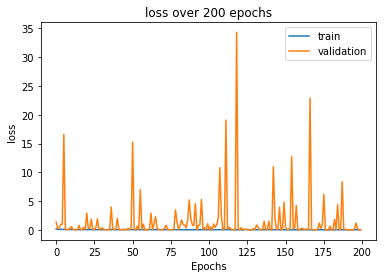

Average Training Score: 0.07908562603330399
Average Validation Score: 1.407598652481597


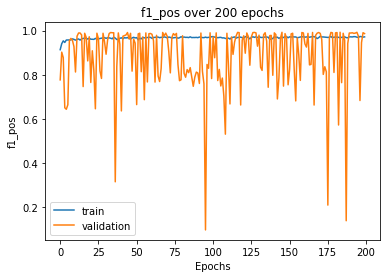

Average Training Score: 0.9669945077934279
Average Validation Score: 0.8793965698556311


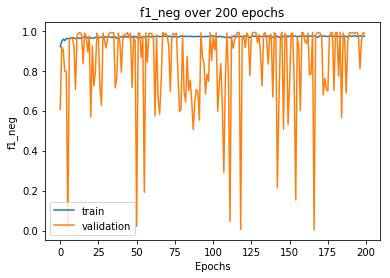

Average Training Score: 0.9695528129711859
Average Validation Score: 0.8442841621489302
Wrote metrics to 'net1-IAM-raw_logs/all_metrics.csv'



In [4]:
from model_utils import create_model_architecture
from train_utils import train

use_gpu = True
device_name = 'cuda' if use_gpu else 'cpu'
print('device_name', device_name)

batch_size = 100

phases = ['train', 'val']
metric_types = ['loss', 'tn', 'fp', 'fn', 'tp', 'f1_pos', 'f1_neg']
metric_types_plot = ['loss', 'f1_pos', 'f1_neg']
metric_names_all = [p+'-'+m for p in phases for m in metric_types]
metric_names_plot = [p+'-'+m for p in phases for m in metric_types_plot]

all_metrics = {metric : [] for metric in metric_names_all}

num_training_epochs = 200

data_loaders = {t : torch.utils.data.DataLoader(imagefolders[t], batch_size = batch_size, shuffle = True, num_workers = 4)
                for t in phases}

model = create_model_architecture('net1', use_gpu = use_gpu)

criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

trained_model, train_metrics = train(model,
                                     criterion,
                                     optimizer,
                                     data_loaders['train'],
                                     data_loaders['val'],
                                     num_epochs=num_training_epochs,
                                     use_gpu = use_gpu)

all_metrics = train_metrics

for metric in metric_types_plot:
    plot_values(all_metrics['train-' + str(metric)],
               all_metrics['val-' + str(metric)],
               str(metric) + " over " + str(num_training_epochs) + " epochs",
               ylabel = str(metric))

# write metrics to file
write_metrics_to_csv(all_metrics, metric_names_all, 'net1-IAM-raw_logs', 'all_metrics.csv')

print()


In [5]:
torch.save(trained_model.state_dict(), 'models/net1-IAM-1.pt')

In [6]:

# import sys
# import os
# sys.path.append(os.path.abspath('../../../'))
# from detection.lib.model.ImageROI import ImageROI
# from PIL import Image

# # book_data_dir = '/home/rahul/data/printed_with_ids_harsh_filter/books-preprocessed-images'
# # img_loc = book_data_dir + '/Dryden/positive/307.png'
# # Testing with image of dimensions 1000x1381

# img_loc = '/home/rahul/data/printed_with_ids_harsh_filter/books-preprocessed-images/Allestree/positive/1307.png'
# pilimg = Image.open(img_loc)
# w, h = pilimg.size
# imgrois = [ImageROI(0, 0, w, h)]
# imgarr = np.asarray(pilimg)

# from bounding_box_classification import get_pos_rois
# # net1 = Net1()

# # Modify this as necessary
# # imgrois = [ImageROI(0, 0, 1000, 700), ImageROI(0, 750, 1000, 500)]
# trained_model.train(False)
# with torch.set_grad_enabled(False):
#     pos_rois = get_pos_rois(trained_model,
#                             (pilimg, imgrois),
#                             model_transform = net1_data_transforms['test'],
#                             model_input_size = (64,64),
#                             stride=(32, 32))

# for rois in pos_rois:
#     for roi in rois:
#         print(roi.toString())
        
# all_rois = [roi for rois in pos_rois for roi in rois]
    
# print('number of pos ROIs found', len(all_rois))

# from detection.lib.ImgProcessor import ImgProcessor
# from detection.lib.utils.Utils import plt_img
# # plot the rois and plot only certain information according to the set
# # imgProcessor = ImgProcessor()
# # img = imgProcessor.loadImage(inFilename=img_loc)
# roi_level_set = set([1])
# plt_img(imgarr, rois=all_rois, roi_level_set=roi_level_set)

In [7]:

# import sys
# import os.path
# sys.path.append(os.path.abspath('../../../'))


# # from detection.lib.ImgProcessor import ImgProcessor
# import matplotlib.pyplot as plt
# import numpy as np
# from detection.lib.utils.Utils import *
# from detection.lib.OCREngine import OCREngine
# import pickle

# from PIL import Image

# # 1. parameters
# # root_dir = './sample'
# # img_id = '639'
# # fname = '%s.png' %img_id
# # ocr_engine = 'cv2'
# # f = '%s/%s' % (root_dir,fname)

# ocr_engine = 'tesseract'
# img_id = '1307'
# fname = '1307.png'
# f = '/home/rahul/data/printed_with_ids_harsh_filter/books-preprocessed-images/Allestree/positive/1307.png'

# # 2. Load the image
# # imgProcessor = ImgProcessor()
# # img = imgProcessor.loadImage(inFilename=f)
# img = np.asarray(Image.open(f))

# # 3. preprocess the image
# # img = imgProcessor.quickPreprocess(img)

# # 4. load the image ground truth
# # img_roi_ground_truth = all_ground_truth[img_id]

# # 5. define the OCR
# # define engine
# ocr = OCREngine(ocr_engine)
# img_roi_ocr, data_df = ocr.image_to_data(img)

# # plot the rois and plot only certain information according to the set
# # roi_level_set = set([2])
# # rois = [(img_roi_ground_truth,'b'), (img_roi_ocr,'r')]
# rois = [(img_roi_ocr,'r')]
# plt_img(img, rois=rois)#, roi_level_set=roi_level_set)

# # save the plot
# plt.savefig('./result/%s_%s_boxes.png' %(fname,ocr_engine))

# # save the bounding boxes to txt
# # save_rois(img_roi_ground_truth,'./result/%s_imgROIs_ground_truth.txt' %fname)
# save_rois(img_roi_ocr,'./result/%s_imgROIs.txt' %fname)

# # save the bounding boxes to pickle
# # with open('./result/%s_imgROIs.pkl' %fname,'wb') as f:
# #     pickle.dump({'ocr':img_roi_ocr, 'ground_truth':img_roi_ground_truth},f)

